In [1]:
#word2vec, glove ?

In [2]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from bs4 import BeautifulSoup
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from seaborn import barplot

In [3]:
train = pd.read_csv('data/drugsComTrain_raw.csv')

In [4]:
test = pd.read_csv('data/drugsComTest_raw.csv')

## Drop missing values

In [5]:
train.dropna(axis=0,inplace=True)
test.dropna(axis=0,inplace=True)

## Create binned classes (Low, Medium, High)

In [6]:
#neg = 1-3 : class 1
#pos = 4-6 : class 2
def rate_class(rating):
    neg = np.arange(1,7)
    pos = np.arange(7,11)
    
    if(rating in neg):
        return 1
    elif(rating in pos):
        return 2
    else:
        return 'Error'

In [7]:
train['rating_class']=train['rating'].apply(rate_class)
test['rating_class']=test['rating'].apply(rate_class)

In [8]:
train = train[train['rating_class']!='Error']
test = test[test['rating_class']!='Error']

## Remove numbers from reviews

In [9]:
def remove_num(review):
    review_text = BeautifulSoup(review, 'html.parser').get_text()
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    return letters_only

In [10]:
train['review'] = train['review'].apply(remove_num)
test['review'] = test['review'].apply(remove_num)

## Visualize words

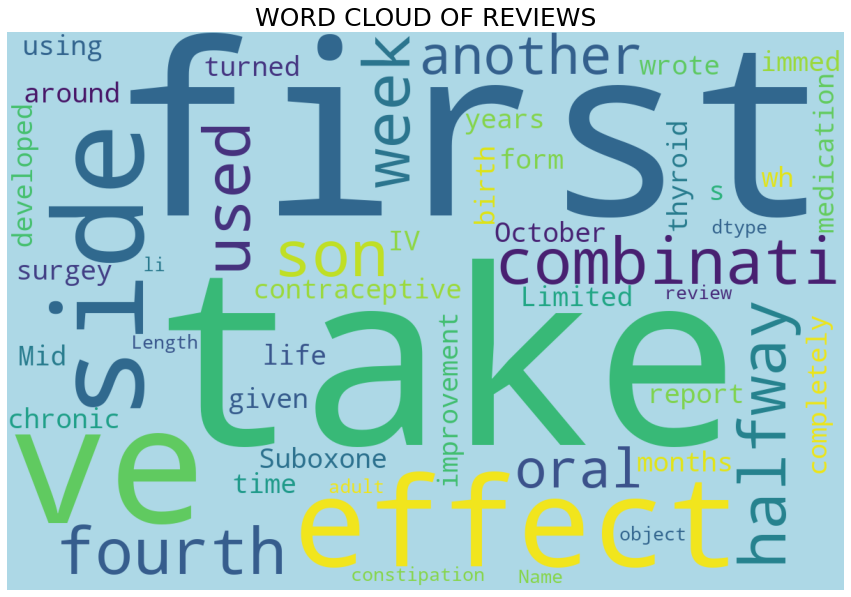

In [11]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

stop_words = set(STOPWORDS)


wordcloud = WordCloud(background_color = 'lightblue', stopwords = stop_words, width = 1200, height = 800).generate(str(train['review']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('WORD CLOUD OF REVIEWS', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## Use TfidVectorizer to extract features from reviews

In [12]:
#Play around with 
# * ngram_range:
# (1,2) = unigrams and bigrams, removed=unigrams only, ngram_range=(2,2) is bigrams
# only. Higher n-grams can be helpful but can lead to overfitting and increases features a lot.
# * min_df = number of documents the word must appear in before it becomes a feature
# * stop words = some stop words are emotional words (e.g aren't). May want to include these
# * max_features = maximum number of features to extract based on word frequency

from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS,min_df=2,ngram_range=(1,3),max_features=1000).fit(train['review'].values)

print("Number of features: ", len(vect.get_feature_names()))

Number of features:  1000


C:\Users\Valen\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Transform using tfid vector and create X_train,X_test,y_train,y_test

In [13]:
words_train = vect.transform(train['review'].values)
words_test = vect.transform(test['review'].values)

In [14]:
feature_names = vect.get_feature_names()

In [15]:
X_train = pd.DataFrame(words_train.toarray(), columns = feature_names)
X_test = pd.DataFrame(words_test.toarray(), columns = feature_names)

In [16]:
y_train = train['rating_class']
y_test = test['rating_class']

In [17]:
X_train

,abdominal,abilify,able,absolutely,accutane,aches,acid,acne,active,actually,...,years old,yeast,yeast infection,yes,yesterday,yr,yrs,zero,zoloft,zombie
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.12242,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
160394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.324723,0.0,0.0,0.0,0.0,0.0,0.0
160395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
160396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
X_test

,abdominal,abilify,able,absolutely,accutane,aches,acid,acne,active,actually,...,years old,yeast,yeast infection,yes,yesterday,yr,yrs,zero,zoloft,zombie
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.177698,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.132482,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0
53467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.14325,0.0
53468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.150012,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0
53469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0


In [19]:
words_train

<160398x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 3890439 stored elements in Compressed Sparse Row format>

In [20]:
#A feature?
train[train['review'].str.match('.*no side effect*.')==True]['rating'].mean()

8.58864403414731

## Data Exploration

C:\Users\Valen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


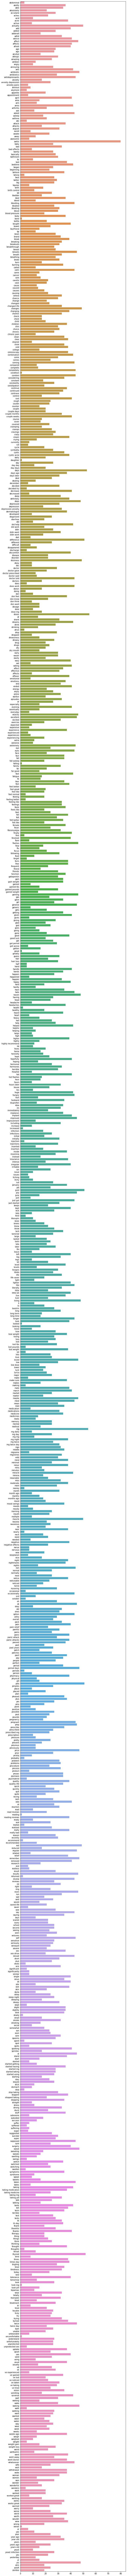

In [21]:
record_counts  = []
for i in range(X_train.shape[1]):
    record_counts.append(sum(X_train.iloc[i,:] > 0))
 

plot = barplot(record_counts,feature_names)
plot.figure.set_size_inches(10,250)

C:\Users\Valen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


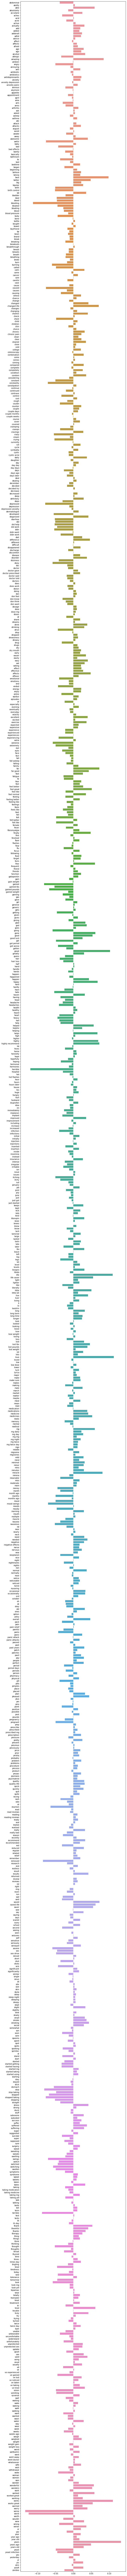

In [23]:
record_corr  = []
for i in range(X_train.shape[1]):
    record_corr.append(np.corrcoef(X_train.iloc[:,i],y_train)[1][0])

plot = barplot(record_corr,feature_names)
plot.figure.set_size_inches(10,250)

## Lower Level Model Testing

In [24]:
#Test various models
#play around with hyperparameters
#play around with classes. Binary classification vs 3 classes

In [25]:
#train the classifier
model = MultinomialNB(alpha = 0.5).fit(X=X_train, y=y_train)

print("Classification accuracy on training set: ", model.score(X_train, y_train))
print("Classification accuracy on testing set: ", model.score(X_test, y_test))

Classification accuracy on training set:  0.753905909051235
Classification accuracy on testing set:  0.7494716762357165


In [26]:
y_pred_train = model.predict(X_train)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_pred=y_pred_train, y_true=y_train, labels=[1, 2]))

              precision    recall  f1-score   support

           1       0.79      0.37      0.50     54088
           2       0.75      0.95      0.84    106310

    accuracy                           0.75    160398
   macro avg       0.77      0.66      0.67    160398
weighted avg       0.76      0.75      0.72    160398



In [28]:
y_pred_test = model.predict(X_test)

In [29]:
print(classification_report(y_pred=y_pred_test, y_true=y_test, labels=[1, 2]))

              precision    recall  f1-score   support

           1       0.79      0.36      0.50     18221
           2       0.74      0.95      0.83     35250

    accuracy                           0.75     53471
   macro avg       0.77      0.66      0.66     53471
weighted avg       0.76      0.75      0.72     53471



In [30]:
model = DecisionTreeClassifier().fit(X=X_train,y=y_train)

print("Classification accuracy on training set: ", model.score(X_train, y_train))
print("Classification accuracy on testing set: ",  model.score(X_test, y_test))

Classification accuracy on training set:  0.998734398184516
Classification accuracy on testing set:  0.8666005872342017


In [31]:
y_pred_train = model.predict(X_train)
print(classification_report(y_pred=y_pred_train, y_true=y_train, labels=[1, 2]))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     54088
           2       1.00      1.00      1.00    106310

    accuracy                           1.00    160398
   macro avg       1.00      1.00      1.00    160398
weighted avg       1.00      1.00      1.00    160398



In [32]:
y_pred_test = model.predict(X_test)
print(classification_report(y_pred=y_pred_test, y_true=y_test, labels=[1, 2]))

              precision    recall  f1-score   support

           1       0.81      0.80      0.80     18221
           2       0.90      0.90      0.90     35250

    accuracy                           0.87     53471
   macro avg       0.85      0.85      0.85     53471
weighted avg       0.87      0.87      0.87     53471



In [33]:
model = LogisticRegression().fit(X=X_train,y=y_train)
print("Classification accuracy on training set: ", model.score(X_train, y_train))
print("Classification accuracy on testing set: ",  model.score(X_test, y_test))

C:\Users\Valen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification accuracy on training set:  0.8037756081746655
Classification accuracy on testing set:  0.8017055974266425


In [34]:
y_pred_train = model.predict(X_train)
print(classification_report(y_pred=y_pred_train, y_true=y_train, labels=[1, 2]))

              precision    recall  f1-score   support

           1       0.75      0.63      0.69     54088
           2       0.83      0.89      0.86    106310

    accuracy                           0.80    160398
   macro avg       0.79      0.76      0.77    160398
weighted avg       0.80      0.80      0.80    160398



In [35]:
y_pred_test = model.predict(X_test)
print(classification_report(y_pred=y_pred_test, y_true=y_test, labels=[1, 2]))

              precision    recall  f1-score   support

           1       0.75      0.63      0.68     18221
           2       0.82      0.89      0.86     35250

    accuracy                           0.80     53471
   macro avg       0.79      0.76      0.77     53471
weighted avg       0.80      0.80      0.80     53471



## Higher Level Model Testing

In [38]:
model = RandomForestClassifier().fit(X=X_train,y=y_train)

print("Classification accuracy on training set: ", model.score(X_train, y_train))
print("Classification accuracy on testing set: ", model.score(X_test, y_test))

Classification accuracy on training set:  0.998734398184516
Classification accuracy on testing set:  0.9091657159955864


In [39]:
y_pred_train = model.predict(X_train)
print(classification_report(y_pred=y_pred_train, y_true=y_train, labels=[1, 2]))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     54088
           2       1.00      1.00      1.00    106310

    accuracy                           1.00    160398
   macro avg       1.00      1.00      1.00    160398
weighted avg       1.00      1.00      1.00    160398



In [40]:
y_pred_test = model.predict(X_test)
print(classification_report(y_pred=y_pred_test, y_true=y_test, labels=[1, 2]))

              precision    recall  f1-score   support

           1       0.92      0.81      0.86     18221
           2       0.91      0.96      0.93     35250

    accuracy                           0.91     53471
   macro avg       0.91      0.88      0.90     53471
weighted avg       0.91      0.91      0.91     53471



In [ ]:
#Create NN